In [1]:
#! pip install climetlab_s2s_ai_competition --quiet

In [2]:
import climetlab as cml 

module 'Magics' has no attribute 'strict_mode'


In [3]:
import climetlab_s2s_ai_competition
print(f'Climetlab version : {cml.__version__}')
print(f'Climetlab-s2s-ai-competition plugin version : {climetlab_s2s_ai_competition.__version__}')

Climetlab version : 0.2.2
Climetlab-s2s-ai-competition plugin version : 0.2.2


# Using Zarr data

## Version 0.1.20 

In [4]:
version = '0.1.20' # version of the data

In [5]:
import pandas as pd
date=pd.date_range(start="2020-01-02", end="2020-06-01", freq="w-thu")
#date = [d.strftime('%Y%m%d') for d in date]
date = [d.to_numpy() for d in date]

In [6]:
import numpy as np
date = [np.datetime64('2020-01-02'),'2020-01-09','20200116']
date

[numpy.datetime64('2020-01-02'), '2020-01-09', '20200116']

Let us get the zarr pointer to the data for realtime data. The "date" argument also accept lists of values.

In [7]:
rt = cml.load_dataset("s2s-ai-competition-reference-set",
                         date=date,
                         version=version,
                         #hindcast=True,
                         format='zarr').to_xarray()

By downloading data from this dataset, you agree to the their terms: Attribution 4.0 International(CC BY 4.0). If you do not agree with such terms, do not download the data. For more information, please visit https://www.ecmwf.int/en/terms-use and https://apps.ecmwf.int/datasets/data/s2s/licence/.


Hindcast data are retrieved with hindcast=True.

In [8]:
hc = cml.load_dataset("s2s-ai-competition-reference-set",
                         date=date,
                         version='0.1.20',
                         hindcast=True,
                         format='zarr').to_xarray()

This climetlab dataset can be used as a xarray.Dataset :

In [10]:
rt

<xarray.Dataset>
Dimensions:        (forecast_time: 3, latitude: 121, longitude: 240, realization: 51, step: 47)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 ... 2020-01-16
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
Data variables:
    t2m            (forecast_time, realization, step, latitude, longitude) float32 ...
    time           (forecast_time, step) datetime64[ns] 2020-01-02 ... 2020-0...
    tp             (forecast_time, realization, step, latitude, longitude) float32 ...
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            2
    GRIB_subCentre:          0
    institution:             European Centre for Medium-Range Weather Forecasts

In [11]:
hc

<xarray.Dataset>
Dimensions:        (forecast_time: 60, latitude: 121, longitude: 240, realization: 11, step: 47)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2000-01-02 ... 2019-01-16
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * realization    (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
Data variables:
    t2m            (forecast_time, realization, step, latitude, longitude) float32 ...
    time           (forecast_time, step) datetime64[ns] 2000-01-02 ... 2019-0...
    tp             (forecast_time, realization, step, latitude, longitude) float32 ...
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            2
    GRIB_subCentre:          0
    institution:             European Centre for Medium-Range Weather Forecasts

### Computing average and plotting

In [12]:
#ds = rt.to_xarray()
cmlds = cml.load_dataset("s2s-ai-competition-reference-set",
                         date=date[0:2],
                         version='0.1.20',
                         hindcast=True,
                         format='zarr')
ds = cmlds.to_xarray()

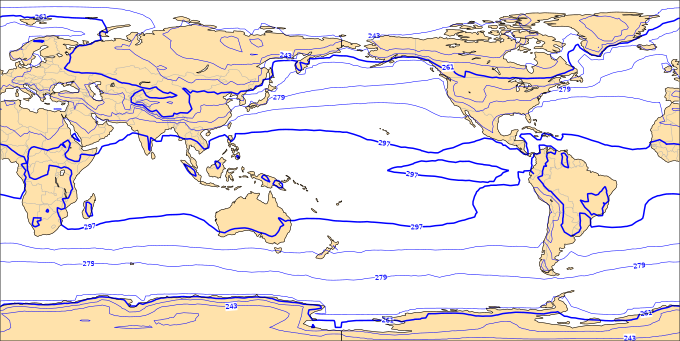

In [13]:
mean1 = ds.mean(dim="step")
cml.plot_map(mean1.isel(forecast_time=0, realization=0))

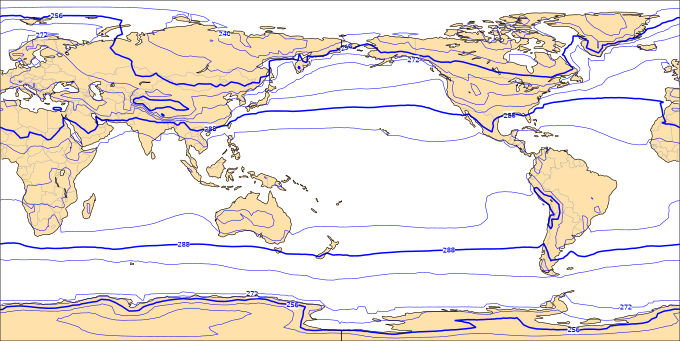

In [14]:
mean2 = ds.mean(dim="forecast_time")
cml.plot_map(mean2.isel(step=20, realization=0))

In [15]:
#mean3 = ds.mean(dim="time")
#cml.plot_map(mean3.isel(forecast_time=20, realization=0))

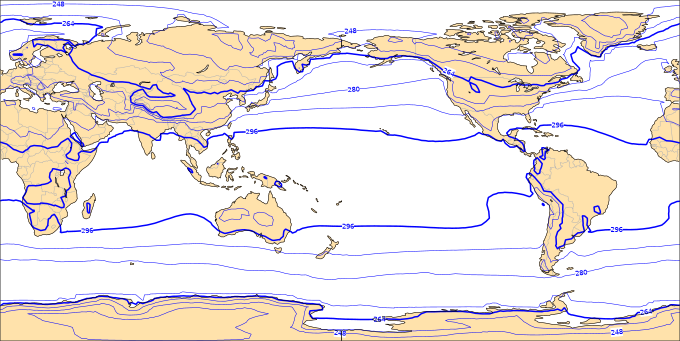

In [16]:
mean3 = ds.mean(dim=["forecast_time", "step"])
cml.plot_map(mean3.isel(realization=0))

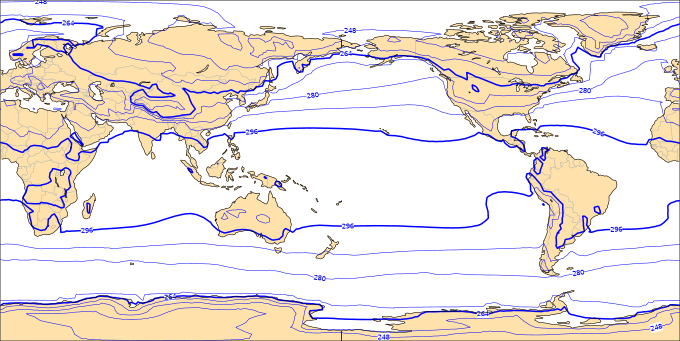

In [17]:
mean3 = ds.mean(dim=["forecast_time", "step", "realization"])
cml.plot_map(mean3)

In [18]:
cmlds = cml.load_dataset("s2s-ai-competition-reference-set",
                         date=date[0:2],
                         version='0.1.20',
                         hindcast=True,
                         format='zarr')

MemoryError: Unable to allocate 2.24 GiB for an array with shape (40, 11, 47, 121, 240) and data type float32

In [ ]:
ds = cmlds.to_xarray()
ds

In [ ]:
mean3 = ds.mean(dim=["step"])
#mean3 = ds.mean(dim=["step", "realization"])
cml.plot_map(mean3.isel(forecast_time=1))
#cml.plot_map(mean3.isel(realization=0,forecast_time=1))